In [1]:
#การลดมิติข้อมูล

# Workshop 1 :คัดกรองด้วยค่า Correlation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
cols = ['preg', 'plas', 'pres', 'skin', 'insu', 'bmi', 'pedi', 'age', 'class']
df = pd.read_csv('data/pima-indians-diabetes.csv', names=cols)
df.head() # ชื่อคอลัมน์ยังไม่มี

,preg,plas,pres,skin,insu,bmi,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()# ผลตรวจสอบได้ค่า 0 ไม่มีข้อมูลสุญหาย

preg     0
plas     0
pres     0
skin     0
insu     0
bmi      0
pedi     0
age      0
class    0
dtype: int64

In [4]:
df.describe().round(2) # แสดงคำอธิบาย
# จะเห็นว่า bmi มีค่า 0 ด้วย จัดเป็น outlier

,preg,plas,pres,skin,insu,bmi,pedi,age,class
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


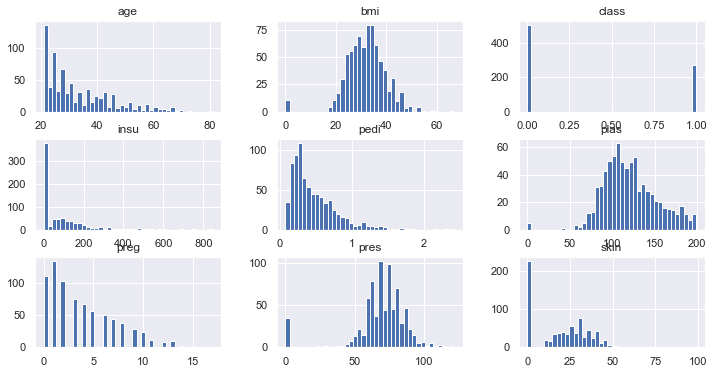

In [5]:
# สร้างฮิสโทแกรม เทียบแต่ละค่า
df.hist(bins=40, figsize=(12, 6))
plt.show()

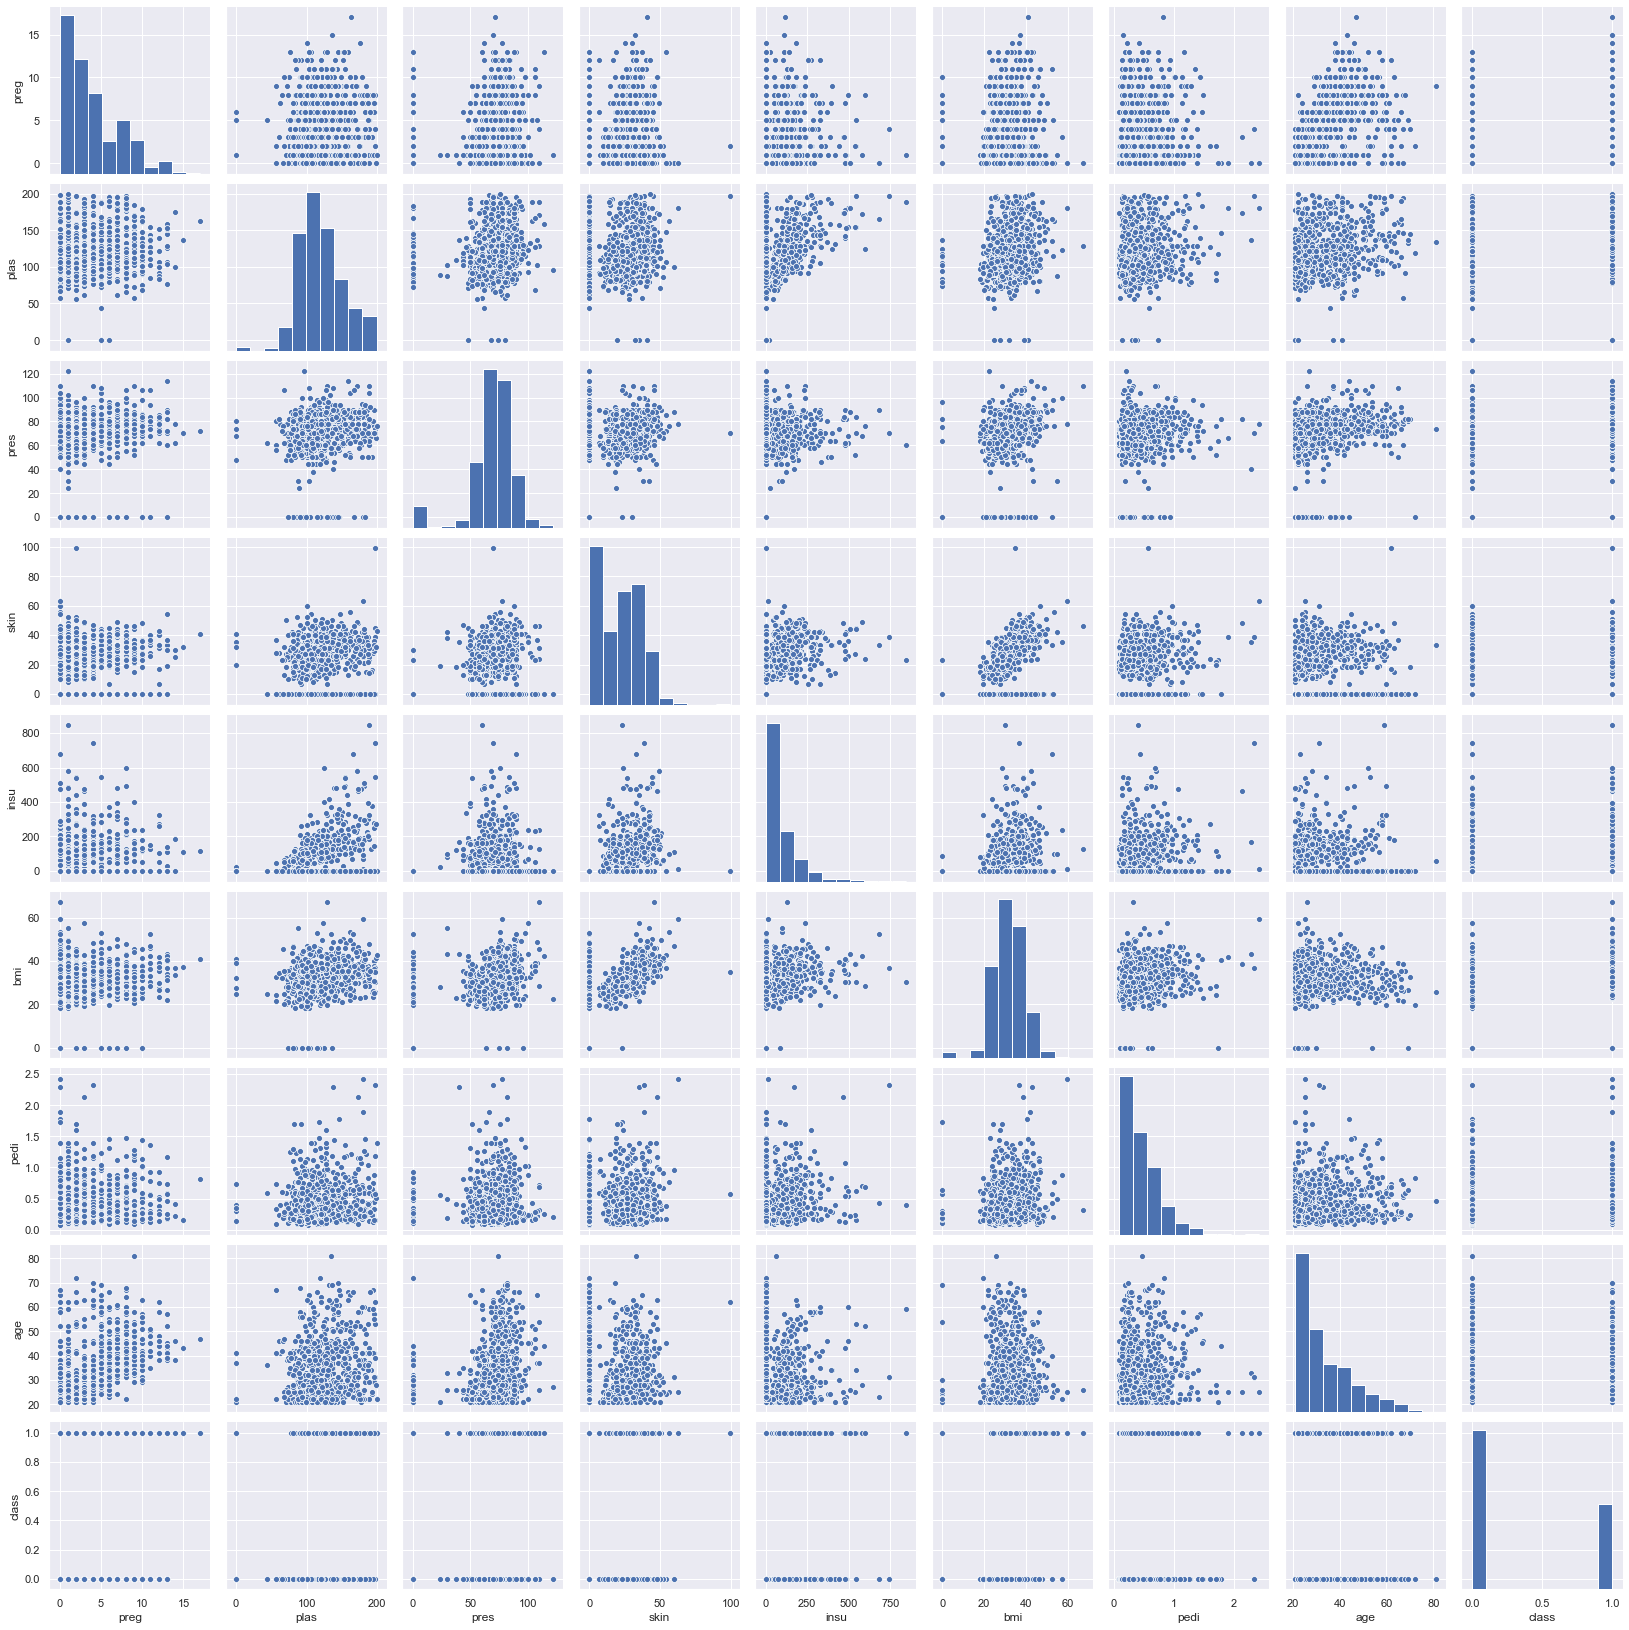

In [6]:
# พล็อตกราฟจุดเป็นคู่
sns.pairplot(df)
plt.show()

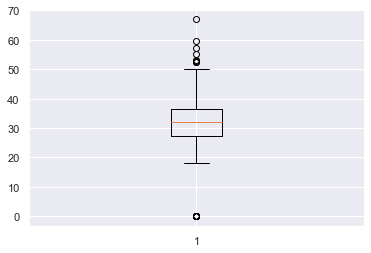

In [7]:
plt.boxplot(df.bmi) # boxplot ค่า bmi
plt.show() # จเห็น outlier ส่วนหนึ่งที่ควรกำจัดออก

In [8]:
df[df.bmi == 0] # ลิสรายการที่ bmi = 0

,preg,plas,pres,skin,insu,bmi,pedi,age,class
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [9]:
bmi_zero = df.bmi[df.bmi == 0].count() # เก็บเฑาะ bmi = 0 ไว้ นับจำนวน
print('bmi zero = {}'.format(bmi_zero))
print('{:.2f}%'.format(bmi_zero/df.shape[0]*100)) # df.shape[0] นับรูปร่างจำนวน คอลัม0

bmi zero = 11
1.43%


In [10]:
# จะพบว่า bmi = 0 มี 1.43%s ไม่มีผลมากใช้วิธีเติมด้วยค่าเฉลี่ย
df['bmi'] = df.bmi.replace(0, df.bmi.mean()) # แทนที่ bmi=0(missing data) ด้วยค่า mean
df.describe().round(2) # ตรวจดูเปลี่ยนแปลงไปหรือยัง

,preg,plas,pres,skin,insu,bmi,pedi,age,class
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,32.45,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,6.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,18.20,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [11]:
# ถา้ต้องการตัดคอลัมน์ออกไป
# df = df[df.bmi > 0]
# df = df[df.plas > 0]
# df = df[df.skin > 0]
# df = df[(df.bmi>0) & (df.plas >0) & (df.skin>0) & (df.insu>0)]

In [12]:
# ฟังก์ชันสำหรับตรวจค่าอ่านๆทีละหลายๆคอลัมน์
def chk_zero(cl):
    zero = df[cl][df[cl] == 0].count()
    print('{:5} {:5} {:7.2f} %'.format(cl, zero, zero/df.shape[0]*100))



# เรียกใช้งาน
print('Zero count: \n---------------------')
for col in df.columns:
    chk_zero(col)
print('---------------------')

Zero count: 
---------------------
preg    111   14.45 %
plas      5    0.65 %
pres     35    4.56 %
skin    227   29.56 %
insu    374   48.70 %
bmi       0    0.00 %
pedi      0    0.00 %
age       0    0.00 %
class   500   65.10 %
---------------------


In [13]:
# จากการตรวจสอบพบว่า insu มี outlier 48.70% ควร drop ทิ้ง
df.drop('insu', axis=1, inplace=True)

In [14]:
# เรียกใช้งาน
print('Zero count: \n---------------------')
for col in df.columns:
    chk_zero(col)
print('---------------------')

Zero count: 
---------------------
preg    111   14.45 %
plas      5    0.65 %
pres     35    4.56 %
skin    227   29.56 %
bmi       0    0.00 %
pedi      0    0.00 %
age       0    0.00 %
class   500   65.10 %
---------------------


In [15]:
#ส่วนค่าที่เหลืออาจมี outlier(==0) ได้ สมเหตุสมผล
df.describe().round(2)

,preg,plas,pres,skin,bmi,pedi,age,class
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,32.45,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,6.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,18.20,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,67.10,2.42,81.00,1.00


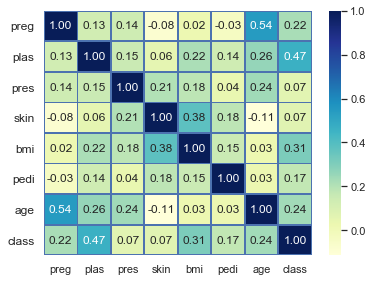

In [16]:
plt.figure(figsize=(6,4.5))
cor = df.corr()
g = sns.heatmap(cor, annot=True, cmap='YlGnBu', linewidths=0.8,
               linecolor='b', fmt='.2f')
g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)
plt.show()

In [17]:
cols_fts = ['preg','plas','skin','bmi','pedi','age','pres']

In [18]:
# สมมติเพิ่มตัวแปร test มา
X = df[cols_fts].copy()# X คือ คอลัมน์ที่เป็น features ไม่มีคอลัมน์ class แล้ว
X['test'] = df['age']*.7 - df['pedi'] *9
X.head() 


,preg,plas,skin,bmi,pedi,age,pres,test
0,6,148,35,33.6,0.627,50,72,29.357
1,1,85,29,26.6,0.351,31,66,18.541
2,8,183,0,23.3,0.672,32,64,16.352
3,1,89,23,28.1,0.167,21,66,13.197
4,0,137,35,43.1,2.288,33,40,2.508


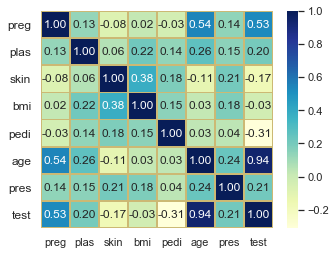

In [19]:
plt.figure(figsize=(5.2, 4))
corr = X.corr()
g = sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths=0.8,
               linecolor='y', fmt='.2f')
g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)
plt.show()

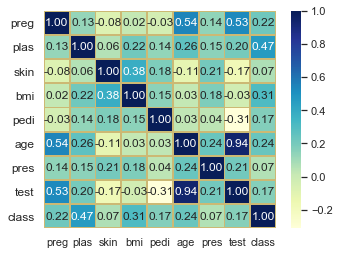

,preg,plas,skin,bmi,pedi,age,pres,test,class
0,6,148,35,33.6,0.627,50,72,29.357,1
1,1,85,29,26.6,0.351,31,66,18.541,0
2,8,183,0,23.3,0.672,32,64,16.352,1
3,1,89,23,28.1,0.167,21,66,13.197,0
4,0,137,35,43.1,2.288,33,40,2.508,1


In [20]:
# จะเห็นว่า age และ test ที่สร้างมามีความสัมพันธ์ค่อนข้างสูง ตัดทิ้งได้ 1 คอลัมน์
X2 = X.copy() # ตั้งค่า X2 ให้มีค่าเท่ากัย X (Features)
X2['class'] = df['class']
corr = X2.corr()
#ใส่ Class / Target เข้าไป
corr = X2.corr() # คำนวณหาค่าความสัมพันธ์ Correlation 
plt.figure(figsize=(5.2, 4))
g = sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths=0.8,
               linecolor='y',  fmt='.2f')
g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)
plt.show()
X2.head()

# Workshop 2 : คัดกรองตัวแปร low Variance

In [21]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler as Scaler # Normalization 0-1 เพราะ Variance มีค่าต่างกันแต่ละตัวแปร
X = X2.drop('class', axis=1)
sc = Scaler()
X_sc = sc.fit_transform(X) # Normalization 0-1

df_sc = pd.DataFrame(X_sc, columns=X.columns) # เก็บ ที่ทำtransform แล้วลงในตัวแปร df_sc
df_sc.head().round(3)

,preg,plas,skin,bmi,pedi,age,pres,test
0,0.353,0.744,0.354,0.315,0.234,0.483,0.590,0.592
1,0.059,0.427,0.293,0.172,0.117,0.167,0.541,0.401
2,0.471,0.920,0.000,0.104,0.254,0.183,0.525,0.363
3,0.059,0.447,0.232,0.202,0.038,0.000,0.541,0.307
4,0.000,0.688,0.354,0.509,0.944,0.200,0.328,0.119


In [22]:
# จัดเรียงจากมากไปน้อย *1000 ให้ดูง่าย
df_sc.var().sort_values(ascending=False).round(5) * 1000

preg    39.29
age     38.42
skin    25.96
plas    25.81
pres    25.17
test    23.22
pedi    20.01
bmi     19.77
dtype: float64

# Workshop 3 : เลือก Feature ด้วย Univariate Selection

In [23]:
df['class'] = df['class'].astype('category')
X = X.drop(['test'], axis=1)
X.head(3)

,preg,plas,skin,bmi,pedi,age,pres
0,6,148,35,33.6,0.627,50,72
1,1,85,29,26.6,0.351,31,66
2,8,183,0,23.3,0.672,32,64


In [24]:
y = df['class']
y.head(3)

0    1
1    0
2    1
Name: class, dtype: category
Categories (2, int64): [0, 1]

In [25]:
# ทำการปรับสเกล Normalize
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler as Scaler

sc = Scaler() # ปรับสเกล
X_sc = sc.fit_transform(X) # X_sc, df_sc คือ Features ที่่ Normalized แล้ว
df_sc = pd.DataFrame(X_sc, columns=X.columns)

In [26]:
# ทำการ import ไลบรารี่และ fit ข้อมูลเพื่อเลือก features ที่ดีที่สุด
from sklearn.feature_selection import SelectKBest, chi2
test = SelectKBest(score_func = chi2, k=5) # กำหนดค่า k (จำนวนคอลัมน์ที่ต้องการ)
fit = test.fit(X_sc, y)

np.set_printoptions(precision = 3)
print(fit.scores_) # แสดง scores
features = fit.transform(X_sc)
print(features[0:5, :]) # แสดง features ที่ควรนำไปใช้

[6.56  7.095 0.536 5.073 2.759 8.206 0.144]
[[0.353 0.744 0.315 0.234 0.483]
 [0.059 0.427 0.172 0.117 0.167]
 [0.471 0.92  0.104 0.254 0.183]
 [0.059 0.447 0.202 0.038 0.   ]
 [0.    0.688 0.509 0.944 0.2  ]]


In [27]:
#จะได้ค่า Score ของแต่ละคอลัมน์และแสดงตัวอย่างข้อมูลที่ควรนำไปใช้
# หากต้องการเทียบข้อมูลให้ใช้
dfts = pd.DataFrame(fit.scores_, columns=['score'])
dfts['column'] = X.columns
dfts.sort_values(by= 'score', ascending=False)

,score,column
5,8.205691,age
1,7.094910,plas
0,6.559982,preg
3,5.072897,bmi
4,2.758584,pedi
2,0.536445,skin
6,0.144306,pres


In [28]:
# ควรตัด pres skin ออกไปถ้าต้องการลดให้เหลือ 5 column
cols_fts = dfts.sort_values(by='score', ascending=False).head(5).column # เรียงลำดับ 5 อันดับคะแนนสูงสุด
#cols_fts = dfts.nlargest(5, 'score').column # หรือใช้ nlargest
X_fts = df_sc[cols_fts].copy()
X_fts.shape #จะเหลือ 5 คอลัมน์ 

(768, 5)

In [29]:
# นำ 5 คอลัมน์ไปสร้าฃ Model และ คำนณหาค่าความแม่นยำ
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

model = SVC(kernel= 'linear')

cvs = cross_val_score(model, X_fts, y, cv=10) # ใช้ X ที่เหลือ 5 columns (Normalized)
print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}'.format(cvs.mean()*100))

cross val scores [0.75 0.79 0.77 0.73 0.75 0.81 0.78 0.79 0.72 0.83]
Average (%) = 77.21


In [30]:
# จะเห็นว่าเมื่อ ลด features เหลือ 5 คอลัมน์ (ลดไป 62%) ได้ค่าความแม่นยำ 77.21% ซึ่งใกล้เคียงกับการใช้ features เต็มที่ 77.34๔

# Workshop 4 : การเลือกด้วยวิธีเวียนกำจัด
RFE (Recursive Feature Elimination) เป็นเทคนิค Feature Selection ที่วนรอบการกำจัดเอา Feature ออกไป 
มีหลักการคือต้องการสร้าง Model classifier ตัวฐานก่อน จากนั้นทำการประเมิณ Features แล้วรายงานผลว่า Feature ตัวใดควรเอาไว้ ควรตัดทิ้ง

In [31]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

model = LinearSVC() # สร้าง model classifier เพื่อนประเมิณ feature ย่อยๆ
rfe = RFE(model, 5) # สร้าง RFE model และ เลือก 5 Features
rfe = rfe.fit(X_sc,y)

print(rfe.support_) # แสดงผลการประเมิณการเลือก Features
print(rfe.ranking_)

[ True  True False  True  True False  True]
[1 1 3 1 1 2 1]


In [32]:
# 1(True) ควรเลือก Feature นั้นไว้
# ให้อ่าน features ที่เราควรเลือกไว้ใช่้
cols_fts = []
for i,cl in enumerate(X.columns):
    if rfe.support_[i] == True:
        cols_fts.append(cl)
cols_fts # แนะนำให้เลือก features เหล่านี้ไปใช้

['preg', 'plas', 'bmi', 'pedi', 'pres']

In [33]:
# เลือกใช้งาน cols_fts
X_fts = df_sc[cols_fts]
X_fts.head()

,preg,plas,bmi,pedi,pres
0,0.352941,0.743719,0.314928,0.234415,0.590164
1,0.058824,0.427136,0.171779,0.116567,0.540984
2,0.470588,0.919598,0.104294,0.253629,0.524590
3,0.058824,0.447236,0.202454,0.038002,0.540984
4,0.000000,0.688442,0.509202,0.943638,0.327869


In [34]:
# รัน model check ประสิทธิภาพอีกครั้ง
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

model = SVC(kernel= 'linear')

cvs = cross_val_score(model, X_fts, y, cv=10) # ใช้ X ที่เหลือ 5 columns (Normalized)
print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}'.format(cvs.mean()*100))
# จะได้ประสิทธิภาพลดลงเล็กน้อยจากิธีก่อนหน้าไม่ซับซ้อน

cross val scores [0.73 0.78 0.79 0.74 0.74 0.79 0.79 0.79 0.71 0.83]
Average (%) = 76.95


# Worlshop 5 : ทำ Standard Scale ข้อมูล Iris 

ก่อนจะทำ PCA จะต้องจัดการความแปรปรวนของคอลัมน์เสียก่อน เนื่อจากเทคนิคPCA จะให้ความสำคัญกับคอลัมน์(ตัวแปร)ที่มีความแปรปรวนสูงก่อนซึ่งจะเกิดปัญหากับข้อมูล
ที่มี Features หรือ คอลัมน์ที่มีช่วงสเกลห่างกันมาก

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time # ใช้สำหรับจับเวลาในบางขั้นตอน

df = sns.load_dataset('iris')
df.head() # ดูข้อมูล

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
# เตรียม Features(Input)
X = df.drop('species', axis=1) # ลบคอลัมน์ species (Label ชนิดดอก) ทิ้งไป
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
# เตรียม Labels(Output)
y = df.species
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [38]:
# ลดสเกลของ X ด้วย Standard Scale
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # สร้าง Obj สำหรับทำ Standard Scale
X_sc = sc.fit_transform(X) # X_sc คือข้อมูลที่ทำการปรับสเกลแล้ว จะจัดอยู่ในรูป Matrix 

# นำ Matrix ไปสร้างเป็น Data Frame ด้วย Pandas
cols = ['SL', 'SW', 'PL', 'PW']
sc_df = pd.DataFrame(X_sc, columns=cols)
sc_df.head() # ดูข้อมูลที่ลดสเกลแล้ว

,SL,SW,PL,PW
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [39]:
# ดูข้อมูลเดิมๆ
df.describe().round(2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [40]:
# ดูข้อมูลที่ทำ Standard Scaler แล้ว
sc_df.describe().round(2)
#จะเห็นว่าข้อมูลถูกปรับสเกล ให้มีค่าmean = 0 และ std = 1

,SL,SW,PL,PW
count,150.00,150.00,150.00,150.00
mean,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.87,-2.43,-1.57,-1.45
25%,-0.90,-0.59,-1.23,-1.18
50%,-0.05,-0.13,0.34,0.13
75%,0.67,0.56,0.76,0.79
max,2.49,3.09,1.79,1.71


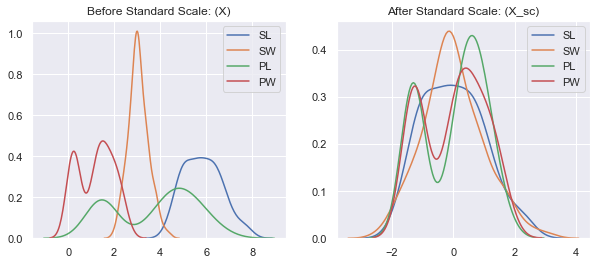

In [41]:
# ทำ Datavisualization ดูการกระจายตัวของข้อมูล
sns.set()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4)) # พล็อตกราฟทั้งสองตั้งค่าขนาดเท่ากัน

# พล็อตค่า ก่อนการทำ Standard Scale
ax1.set_title('Before Standard Scale: (X)')
sns.kdeplot(df['sepal_length'], ax=ax1, label='SL') # Sepal Length
sns.kdeplot(df['sepal_width'], ax=ax1, label='SW') # Sepal Width
sns.kdeplot(df['petal_length'], ax=ax1, label='PL') # Petak Length
sns.kdeplot(df['petal_width'], ax=ax1, label='PW') # Petal Width

# พล็อตค่า หลังการทำำ Standard Scale
ax2.set_title('After Standard Scale: (X_sc)')
sns.kdeplot(sc_df['SL'], ax=ax2)
sns.kdeplot(sc_df['SW'], ax=ax2)
sns.kdeplot(sc_df['PL'], ax=ax2)
sns.kdeplot(sc_df['PW'], ax=ax2)
plt.show()
# จะเห็นว่ากราฟอยู่ในช่วง -2 - 2 (กราฟปรัยสเกลแล้ว)

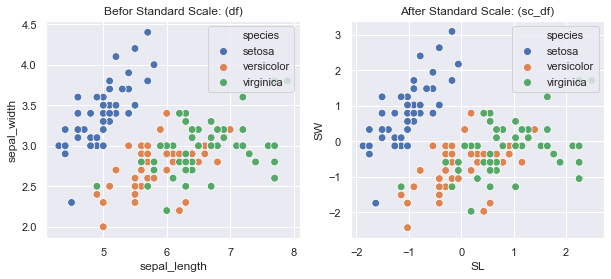

In [42]:
# ผลของการทำ Standard Scale ต่อ Features
sc_df['species'] = df.species # เพิ่มคอลัมน์ชนิดดอก ( Target / Label)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4)) # 2กราฟ ขนาด 10 *4 

ax1.set_title('Befor Standard Scale: (df)') # ก่อน Standard Scale
sns.scatterplot('sepal_length', 'sepal_width', data=df,hue='species', ax=ax1, s=60)
ax2.set_title('After Standard Scale: (sc_df)') # หลัง Standard Scale
sns.scatterplot('SL','SW', data=sc_df, hue='species', ax=ax2, s=60)
plt.show()
# จะเห็นว่าค่าเสเกล x,y ต่างกันจริงแต่ scale แต่ภาพรวมของ features ยังเท่าเดิม

# Workshop 6 : ลดมิติด้วย PCA

In [43]:
# คำนวณ PCA
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_sc) # X_pca คือข้อมูลที่ทำ PCA แล้วจัดอยู่ในรูปเมทริกซ์

df['pca1'] = X_pca[:,0] # PCA 1
df['pca2'] = X_pca[:,1] # PCA 2
df['pca3'] = X_pca[:,2]
df['pca4'] = X_pca[:,3]
df.head().round(2)

#PCA1 คือ ความแปรปรวนของข้อมูลสูงสุด เป็นตัวแทนของข้อมูลทั้งหมดได้ดีที่สุด

,sepal_length,sepal_width,petal_length,petal_width,species,pca1,pca2,pca3,pca4
0,5.1,3.5,1.4,0.2,setosa,-2.26,0.48,-0.13,-0.02
1,4.9,3.0,1.4,0.2,setosa,-2.08,-0.67,-0.23,-0.10
2,4.7,3.2,1.3,0.2,setosa,-2.36,-0.34,0.04,-0.03
3,4.6,3.1,1.5,0.2,setosa,-2.30,-0.60,0.09,0.07
4,5.0,3.6,1.4,0.2,setosa,-2.39,0.65,0.02,0.04


In [44]:
df.describe().round(2) # ดูสรุปค่าสถิติ mean ยังเป็น 0 อยู่

,sepal_length,sepal_width,petal_length,petal_width,pca1,pca2,pca3,pca4
count,150.00,150.00,150.00,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,0.00,0.00,0.00,0.00
std,0.83,0.44,1.77,0.76,1.71,0.96,0.38,0.14
min,4.30,2.00,1.00,0.10,-2.77,-2.65,-0.86,-0.47
25%,5.10,2.80,1.60,0.30,-2.10,-0.60,-0.26,-0.09
50%,5.80,3.00,4.35,1.30,0.42,0.02,0.02,-0.01
75%,6.40,3.30,5.10,1.80,1.34,0.59,0.19,0.07
max,7.90,4.40,6.90,2.50,3.31,2.69,1.01,0.49


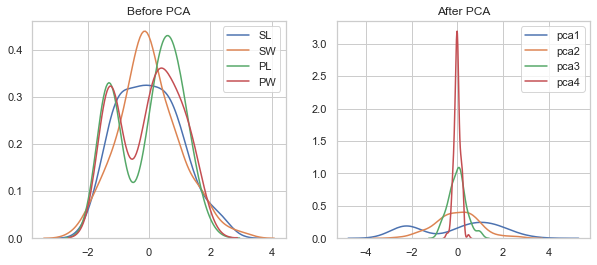

In [45]:
# พล็อตดูการกระจาย

sns.set_style('whitegrid')
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,4))

# พล็อตค่า ก่อนการทำ PCA
ax1.set_title('Before PCA')
sns.kdeplot(sc_df['SL'], ax=ax1)
sns.kdeplot(sc_df['SW'], ax=ax1)
sns.kdeplot(sc_df['PL'], ax=ax1)
sns.kdeplot(sc_df['PW'], ax=ax1)

# พล็อตค่า หลังการทำำ Standard Scale
ax2.set_title('After PCA')
sns.kdeplot(df['pca1'], ax=ax2)
sns.kdeplot(df['pca2'], ax=ax2)
sns.kdeplot(df['pca3'], ax=ax2)
sns.kdeplot(df['pca4'], ax=ax2)
plt.show()

# PCA1 มีการกระจายตัวมากสุด(กราฟยุบ) เนื่องจากการกระจายตัวของข้อมูลมีผลต่อความแปรปรวนของข้อมูล
# ซึ่งมีผลโดยตรงกับ Machine Learning ดังนั้นการเลือกข้อมูลพิจารณาควรเลือกที่ PCA1 และPCA2

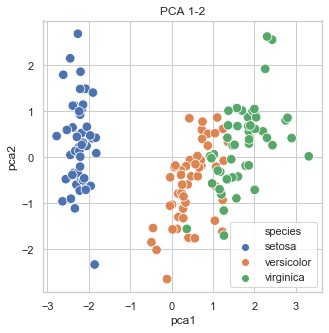

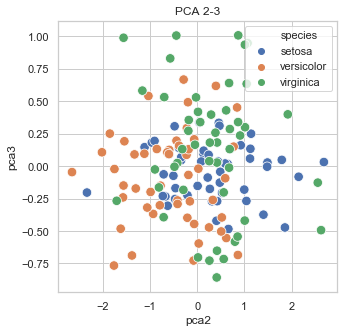

In [46]:
# พล็อตดูความสัมพันธ์ PCA
# PCA1 & PCA2 มา scatter plot
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = 5,5
sns.scatterplot('pca1', 'pca2', data=df, hue='species',s=90)
plt.title('PCA 1-2') # จะเห็นว่าข้อมูลแยกกันพอมองออก
plt.show()

# PCA2 & PCA3
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = 5,5
sns.scatterplot('pca2', 'pca3', data=df, hue='species',s=90)
plt.title('PCA 2-3') # จะเห็นว่าข้อมูลแยกกันพอมองออก
plt.show()

In [47]:
# คา่ Explained Variance ของ PCA
# จะมีค่าระหว่าง0-1 ใช้เพื่อพิจารณาเรือกข้อมูลไป train
exp_variance = pca.explained_variance_ratio_
exp_variance

array([0.73 , 0.229, 0.037, 0.005])

In [48]:
#จับแต่ละคู่แล้วรวมค่า
np.cumsum(pca.explained_variance_ratio_)
# อธิบายได้ว่าใช้ PCA 1 : อธิบายข้อมูลได้ 73%
#             PCA 1-PCA 2 : อธิบายข้อมูลได้ 95.8%
#             PCA 1-PCA 2-PCA 3 : อธิบายข้อมูลได้ 99.5%

array([0.73 , 0.958, 0.995, 1.   ])

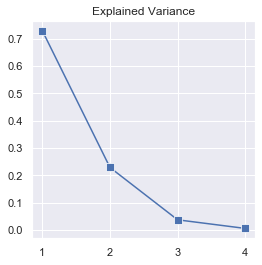

In [49]:
# กรรณีที่มี Features(PCA) มากๆ การดูค่าอาจยากควทำ Data Visualization
# แยกกันแต่ละตัว
sns.set()
plt.rcParams['figure.figsize'] = 4,4
x = list(range(1, len(exp_variance)+1))
sns.lineplot(x, exp_variance, marker='s', markersize=8)
plt.xticks(x)
plt.title('Explained Variance')
plt.show()

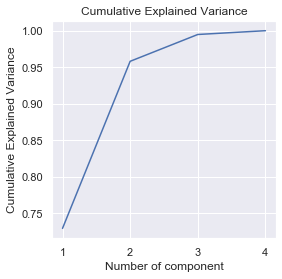

In [50]:
# พล็อตดูค่า Cumulative Explained Variance
import numpy as np
x = list(range(1, len(exp_variance)+1))
plt.plot(x, np.cumsum(pca.explained_variance_ratio_))
plt.xticks(x)
plt.xlabel('Number of component')
plt.ylabel('Cumulative Explained Variance');
plt.title('Cumulative Explained Variance');
plt.show() 


In [51]:
# กรณีที่เรามี Cumulative Explained Variance ในใจอยู่แล้วสามารถทำนายย้อนกลับได้

pca_num = PCA(.95) # ต้องการ 95%
pca_num.fit(X) # ทำการคำนวณ PCA
pca_num.n_components_ # ผลลัพธ์คือ 2 นั่นคือใช้ 2 features เพื่อ train แล้วจะให้ผลใกล้เคียงกับตัวแทนข้อมูลทั้งหมด

2

# Workshop 7 : นำ PCA ไปใช้ Train และ Predict
ก่อนที่จะนำไป train เราจะต้องกำหนด % ที่คาดหวังการแทนที่ของข้อมูล โดย Workshop ที่แล้วกำหนดที่ 95 % 
เพราะฉะนั้นจะได้ Component 2 ตัว PCA1-PCA2 แะใช้ตัวแปรดังกล่าว ทำ Split Train Test

In [52]:
#Split และเลือก PCA 2 ตัว

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=0)
X_train.shape, y_train.shape


((105, 4), (105,))

In [54]:
X_train[:3]

array([[-1.022, -2.434, -0.147, -0.262],
       [ 0.796, -0.132,  0.99 ,  0.791],
       [ 1.038,  0.559,  1.104,  1.712]])

In [55]:
# Default
#pca = PCA()
pca = PCA(n_components=1)
#pca = PCA(n_components = 2) # ต้องการ Conponents 2 
#pca = PCA(n_components = 3)
#pca = PCA(n_components = 4)

# จับเวลา
start = time()
pca.fit(X_sc) # คำนวณ PCA จาก X_sc ที่ได้จากการทำ Standard Scale

X_train_sc = sc.transform(X_train)
X_train_pca = pca.transform(X_train_sc) # สร้างค่า Feature PCA1 PCA2

X_test_sc = sc.transform(X_test)
X_test_pca = pca.transform(X_test_sc)

print('{:.5f} sec'.format(time()-start))
X_train_pca.shape, X_test_pca.shape

0.00100 sec


((105, 1), (45, 1))

In [56]:
#ทำการ Train
from sklearn.svm import SVC
model = SVC(kernel='linear')

start = time()
model.fit(X_train_pca, y_train)
print('{:.5f} sec'.format(time()-start)) # ครวบ time() นับเวลา train model

y_pred = model.predict(X_test_pca) # ทดลอง Predict โดยใช้ X_test_pca Set

0.00200 sec


In [57]:
# การประเมิณ model Accuracy 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)

print('Accuracy {:.3f}'.format(accuracy_score(y_test, y_pred)))
print(cm)

Accuracy 0.889
[[16  0  0]
 [ 0 14  4]
 [ 0  1 10]]


In [58]:
# การประเมิณ Cross Validation โดยใช้ค่า cv=10

from sklearn.model_selection import cross_val_score

X_pca = pca.transform(X_sc) # X_sc ที่ได้จาก Standard Scake ก่อนหน้านี้

# ค่า model จากการ Train ก่อนหน้านี้
cvs = cross_val_score(model, X_pca, y, cv=10)
print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) ={:.2f}'.format(cvs.mean()*100))


cross val scores [0.8  0.93 1.   0.93 0.87 0.8  1.   0.93 1.   0.93]
Average (%) =92.00


In [59]:
# Predict ทำนาย input ใหม่
df.head() # ช่วงต้น setosa

,sepal_length,sepal_width,petal_length,petal_width,species,pca1,pca2,pca3,pca4
0,5.1,3.5,1.4,0.2,setosa,-2.264703,0.480027,-0.127706,-0.024168
1,4.9,3.0,1.4,0.2,setosa,-2.080961,-0.674134,-0.234609,-0.103007
2,4.7,3.2,1.3,0.2,setosa,-2.364229,-0.341908,0.044201,-0.028377
3,4.6,3.1,1.5,0.2,setosa,-2.299384,-0.597395,0.091290,0.065956
4,5.0,3.6,1.4,0.2,setosa,-2.389842,0.646835,0.015738,0.035923


In [60]:
df.iloc[50:55] # ช่วงกลาง versicolor

,sepal_length,sepal_width,petal_length,petal_width,species,pca1,pca2,pca3,pca4
50,7.0,3.2,4.7,1.4,versicolor,1.101781,0.862972,-0.684586,-0.034834
51,6.4,3.2,4.5,1.5,versicolor,0.731337,0.594615,-0.094122,-0.004904
52,6.9,3.1,4.9,1.5,versicolor,1.240979,0.616298,-0.554007,-0.009423
53,5.5,2.3,4.0,1.3,versicolor,0.407483,-1.754404,-0.023102,-0.065769
54,6.5,2.8,4.6,1.5,versicolor,1.075475,-0.208421,-0.398256,-0.104737


In [61]:
df.tail() # =ช่วงท้าย คือ virginica

,sepal_length,sepal_width,petal_length,petal_width,species,pca1,pca2,pca3,pca4
145,6.7,3.0,5.2,2.3,virginica,1.870503,0.386966,0.256274,-0.389257
146,6.3,2.5,5.0,1.9,virginica,1.564580,-0.896687,-0.026371,-0.220192
147,6.5,3.0,5.2,2.0,virginica,1.521170,0.269069,0.180178,-0.119171
148,6.2,3.4,5.4,2.3,virginica,1.372788,1.011254,0.933395,-0.026129
149,5.9,3.0,5.1,1.8,virginica,0.960656,-0.024332,0.528249,0.163078


In [62]:
# สมมติ X_new รับค่าวัดขนาดดอกไม้ จำนวน 3 ดอก
X_pca = pca.transform(X_sc) # ใช้ชุดข้อมูลทั้งหมดมา Train
# ต้อง Train ใหม่เนื่องจาก cross val score ก่อนหน้านี้ทำให้ model เปลี่ยนแปลงไป model.fit(X_pca, y)
model.fit(X_pca, y)

X_new = [                     # X ใหม่ 3 ดอก
    [4.8, 3.1, 1.6, 0.4],
    [6.8, 3.1, 4.6, 1.4],
    [6.6, 3.1, 5.0, 2.0]
    ]

X_new_sc = sc.transform(X_new) # ทำ Standard Scale
X_new_pca = pca.transform(X_new_sc) # ทำ PCA
y_pred = model.predict(X_new_pca) # Predict
print(y_pred)


['setosa' 'versicolor' 'virginica']


In [63]:
# Pipeline 
# ทุกครั้งก่อนที่จะทำเป็นตัวแปร input เราจะต้อง transform ก่อน เพื่อลดความซ้ำซ้อนเหล่านั้น !!!!!!!!! อย่าลืมทุกครั้งที่รันควรตั้งชื่อ pipeline ตัวนั้นให้เหมาะสมเพราะ pipelineตัวนั้นจะจำค่า ต่างๆที่ป้อนเข้าทันที
# ขั้นการ Train and Test
sc = StandardScaler()
X_sc = sc.fit_transform(X) # X_sc คือข้อมูลที่ทำการปรับสเกลแล้ว ข้อมูลอยู่ในรูปเมืริกซ์

pca = PCA(n_components =2) # ใช้ Componet 2 ตัว
pca.fit(X_sc) # คำนวณ PCA
X_pca = pca.transform(X_sc) # ทำ PCA
model.fit(X_pca, y) # สร้าง model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [64]:
# ขั้นการ Predict 
X_new_sc = sc.transform(X_new) # ปรับสเกลด้วยการทำ Standard Scale
X_new_pca = pca.transform(X_new_sc) # ทำ PCA
y_pred = model.predict(X_new_pca) # Predict
# จะเห็นว่าเราทำ 3 ขั้นตอนเดิมๆซ้ำๆ เพื่อลดความยุ่งยากเหล่านี้้เราจะใช้ Pipeline เข้าช่วย

In [65]:
# การสร้าง Pipeline
from sklearn.pipeline import Pipeline

n_comp = 2 # ต้องการ Component 2 ตัว

pipe2 = Pipeline([                               # สร้าง ออปเจ็กต์ โดยมีลำดับการประมวลผล 3 ขั้นตอน
                    ('scaler', StandardScaler()),
                    ('pca', PCA(n_components=n_comp)),
                    ('linearSvc', SVC(kernel='linear'))
                ])
pipe2.fit(X_train, y_train) #ใข้ Pipeline เป็น model
X_new = [                     # X ใหม่ 2 ดอก
    [4.8, 3.1, 1.6, 0.4],
    [6.8, 3.1, 4.6, 1.4],
    [6.6, 3.1, 5.0, 2.0]
    ]
# ค่า model จากการ Train ก่อนหน้านี้
cvs = cross_val_score(pipe2, X, y, cv=10)
print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) ={:.2f}'.format(cvs.mean()*100))
print(pipe2.predict(X_new)) # ผลการ Predict ทำนาย

cross val scores [0.87 0.93 1.   0.93 0.87 0.8  0.93 0.87 1.   0.93]
Average (%) =91.33
['virginica' 'virginica' 'virginica']


In [66]:
from sklearn.pipeline import Pipeline

n_comp = 3 # ต้องการ Component 3 ตัว

pipe3 = Pipeline([                               # สร้าง ออปเจ็กต์ โดยมีลำดับการประมวลผล 3 ขั้นตอน
                    ('scaler', StandardScaler()),
                    ('pca', PCA(n_components=n_comp)),
                    ('linearSvc', SVC(kernel='linear'))
                ])
pipe3.fit(X_train, y_train) #ใข้ Pipeline เป็น model
X_new = [                     # X ใหม่ 3 ดอก
    [4.8, 3.1, 1.6, 0.4],
    [6.8, 3.1, 4.6, 1.4],
    [6.6, 3.1, 5.0, 2.0]
    ]
# ค่า model จากการ Train ก่อนหน้านี้
cvs = cross_val_score(pipe3, X, y, cv=10)
print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) ={:.2f}'.format(cvs.mean()*100))
print(pipe3.predict(X_new)) # ผลการ Predict ทำนาย

cross val scores [1.   1.   1.   1.   0.87 1.   0.87 1.   1.   1.  ]
Average (%) =97.33
['versicolor' 'virginica' 'virginica']


# Workshop 8 : ลดมิติ Digit Classification

In [67]:
#เตรียมชุดข้อมูล
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

digits = datasets.load_digits() # ชุดข้อมูล Digits dataset

In [68]:
n_samples = len(digits.images) # จำนวน Samples คือ 1797
X = digits.images.reshape((n_samples, -1)) # reshape ให้เป็นข้อมูลแถวเดียว (1 Row)
# X = digits.data # หรือใช้ฟิลด์ data
X[0] # ลองดูข้อมูลแถวแรก

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [69]:
X.shape # ชุดข้อมูลมีจำนวน 1797 Samples (Rows) แลั มี Features = 64

(1797, 64)

In [70]:
y = digits.target # Targets / Labels
y[:15] # ดูว่าข้อมูล 15 Rows แรกเป็นเลขอะไร

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

In [71]:
#ทำ PCA
from sklearn.decomposition import PCA
pca = PCA() # ยังไม่กำหนดจำนวน
X_pca = pca.fit_transform(X) # คำนวณ PCA แล้วสร้างค่า PCA1 PCA2
pca.n_components_ # ตรวจสอบว่า PCA แล้วสร้างค่า PCA1 PCA2

64

In [72]:
# ตรวจสอบค่า Explained Variance
exp_variance = pca.explained_variance_ratio_
exp_variance

array([1.489e-01, 1.362e-01, 1.179e-01, 8.410e-02, 5.782e-02, 4.917e-02,
       4.316e-02, 3.661e-02, 3.353e-02, 3.079e-02, 2.372e-02, 2.273e-02,
       1.822e-02, 1.774e-02, 1.467e-02, 1.410e-02, 1.319e-02, 1.248e-02,
       1.018e-02, 9.056e-03, 8.895e-03, 7.971e-03, 7.675e-03, 7.229e-03,
       6.959e-03, 5.961e-03, 5.756e-03, 5.152e-03, 4.895e-03, 4.289e-03,
       3.736e-03, 3.533e-03, 3.367e-03, 3.280e-03, 3.083e-03, 2.938e-03,
       2.566e-03, 2.277e-03, 2.223e-03, 2.114e-03, 1.899e-03, 1.587e-03,
       1.512e-03, 1.406e-03, 1.166e-03, 1.075e-03, 9.641e-04, 7.746e-04,
       5.572e-04, 4.043e-04, 2.099e-04, 8.248e-05, 5.251e-05, 5.052e-05,
       3.300e-05, 1.244e-05, 7.048e-06, 3.014e-06, 1.062e-06, 5.501e-07,
       3.429e-07, 9.507e-34, 9.507e-34, 9.362e-34])

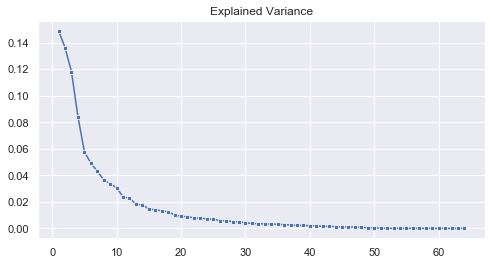

In [73]:
# พล็อตกราฟเพื่อตรวจสอบ เพราะข้อมูบมีจำนวนมกา PCA ถึง 64
sns.set()
plt.rcParams['figure.figsize'] = 8,4
x = list(range(1, len(exp_variance)+1))
sns.lineplot(x, exp_variance, marker='s', markersize=4)
plt.title('Explained Variance')
plt.show()

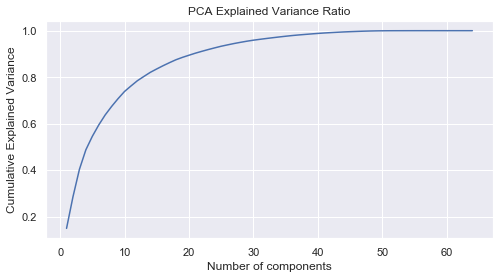

29

In [74]:
# ดูกราฟค่าสะสม
import numpy as np
sns.set()
plt.rcParams['figure.figsize'] = 8,4
x = list(range(1, len(exp_variance)+1)) # พล็อตค่า 1 จนถึง exp_variance +1 
sns.lineplot(x, np.cumsum(pca.explained_variance_ratio_)) # พล็อต x เทียบ y(PCA) ที่จับคู่กัน
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance'); #label y-axis hold ไว้
plt.title('PCA Explained Variance Ratio')
plt.show()
# เลือก PCA ที่เรายอมรับ
pca_num = PCA(.95) # ต้องการ 95%
pca_num.fit(X) # ทำการคำนวณ PCA
pca_num.n_components_ # จะต้องใช้กี่ Component สรุปต้องใช้

In [75]:
# เลือก PCA ที่เรายอมรับ
pca_num = PCA(.95) # ต้องการ 95%
pca_num.fit(X) # ทำการคำนวณ PCA
pca_num.n_components_ # จะต้องใช้กี่ Component สรุปต้องใช้ 29

#กำหนด n_component = 2
n_comp = 2
pca = PCA(n_components = n_comp)
pca.fit(X)
print('Explained variance by % i components: %0.3f' %(n_comp, np.sum(pca.explained_variance_ratio_)))

Explained variance by  2 components: 0.285


In [76]:
X_pca = pca.transform(X) # สร้างค่า Feature PCA1 PCA2 ..
X_pca.shape

(1797, 2)

In [77]:
#พล็อตกราฟเพื่อดูการกระจายตัวข้อมูลเมื่อ ใช้ 2 feature(PCA 2 component)
df = pd.DataFrame(X_pca, columns = ['pca1', 'pca2'])
df.head() # ดูข้อมูลส่วนหัว

df['labels'] = y
df.head()

,pca1,pca2,labels
0,-1.259466,21.274883,0
1,7.957612,-20.768700,1
2,6.991922,-9.955985,2
3,-15.906105,3.332464,3
4,23.306868,4.269061,4


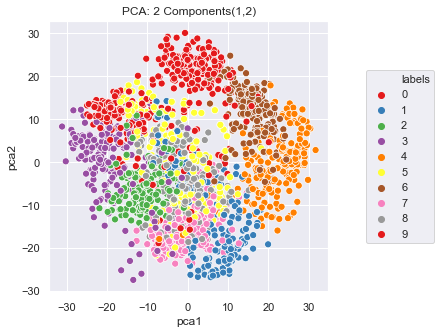

In [78]:
#กราฟ
import seaborn as sns
plt.rcParams['figure.figsize'] = 5, 5 # set size
g = sns.scatterplot('pca1', 'pca2', data=df, hue='labels',
                   s=50, palette='Set1', legend='full')
g.legend(loc= 'center right', bbox_to_anchor=(1.4, 0.5), ncol=1)
plt.title('PCA: 2 Components(1,2)')
plt.savefig('pca1-2_digits', dpi=120)
plt.show()

In [79]:
# เตรียมข้อมูลแลัทดสอบเบื้องต้น

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape , X_test.shape # ขนาด Features 64 คอลัมน์ Z

((1347, 64), (450, 64))

In [80]:
# ทำการสร้างmoel โดยลดมิติของข้อมูลใช้ pca component ที่ 29 25 20 15 10 5 4 3 2
# Prototype Pipeline
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

n_comp = 29
pipe_29 = Pipeline([('pca', PCA(n_components = n_comp, whiten= True)),
                    ('svc', SVC(gamma = 'scale'))
                   ])
pipe_29.fit(X_train, y_train)

cvs = cross_val_score(pipe_29, X, y, cv=10)
print('cross val scores:comp 29 {}'.format(cvs.round(2)))
print('Average(%) comp:29 ={:.2f}'.format(cvs.mean()*100 ))

cross val scores:comp 29 [0.97 0.98 0.94 0.95 0.99 0.98 0.99 0.99 0.98 0.96]
Average(%) comp:29 =97.44


In [81]:
n_comp = 25
pipe_25 = Pipeline([('pca', PCA(n_components = n_comp, whiten= True)),
                    ('svc', SVC(gamma = 'scale'))
                   ])
pipe_25.fit(X_train, y_train)

cvs = cross_val_score(pipe_25, X, y, cv=10)
print('cross val scores comp:25 {}'.format(cvs.round(2)))
print('Average(%) comp:25 ={:.2f}'.format(cvs.mean()*100 ))

cross val scores comp:25 [0.97 0.99 0.94 0.96 0.99 0.98 0.99 0.99 0.98 0.97]
Average(%) comp:25 =97.61


In [82]:
n_comp = 20
pipe_20 = Pipeline([('pca', PCA(n_components = n_comp, whiten= True)),
                    ('svc', SVC(gamma = 'scale'))
                   ])
pipe_20.fit(X_train, y_train)

cvs = cross_val_score(pipe_20, X, y, cv=10)
print('cross val scores comp:20 {}'.format(cvs.round(2)))
print('Average(%) comp:20 ={:.2f}'.format(cvs.mean()*100 ))

cross val scores comp:20 [0.96 0.98 0.92 0.95 0.98 0.98 0.99 1.   0.97 0.97]
Average(%) comp:20 =96.94


In [83]:
n_comp = 15
pipe_15 = Pipeline([('pca', PCA(n_components = n_comp, whiten= True)),
                    ('svc', SVC(gamma = 'scale'))
                   ])
pipe_15.fit(X_train, y_train)

cvs = cross_val_score(pipe_15, X, y, cv=10)
print('cross val scores comp:15 {}'.format(cvs.round(2)))
print('Average(%) comp:15 ={:.2f}'.format(cvs.mean()*100 ))

cross val scores comp:15 [0.94 0.99 0.96 0.94 0.98 0.98 0.99 0.98 0.97 0.97]
Average(%) comp:15 =97.16


In [84]:
n_comp = 10
pipe_10 = Pipeline([('pca', PCA(n_components = n_comp, whiten= True)),
                    ('svc', SVC(gamma = 'scale'))
                   ])
pipe_10.fit(X_train, y_train)

cvs = cross_val_score(pipe_10, X, y, cv=10)
print('cross val scores comp:10 {}'.format(cvs.round(2)))
print('Average(%) comp:10 ={:.2f}'.format(cvs.mean()*100 ))

cross val scores comp:10 [0.96 0.98 0.91 0.94 0.97 0.98 0.94 0.99 0.96 0.94]
Average(%) comp:10 =95.60


In [85]:
n_comp = 5
pipe_5 = Pipeline([('pca', PCA(n_components = n_comp, whiten= True)),
                    ('svc', SVC(gamma = 'scale'))
                   ])
pipe_5.fit(X_train, y_train)

cvs = cross_val_score(pipe_5, X, y, cv=10)
print('cross val scores comp:5 {}'.format(cvs.round(2)))
print('Average(%) comp:5 ={:.2f}'.format(cvs.mean()*100 ))

cross val scores comp:5 [0.9  0.94 0.85 0.85 0.92 0.87 0.9  0.89 0.88 0.9 ]
Average(%) comp:5 =89.15


In [86]:
n_comp = 4
pipe_4 = Pipeline([('pca', PCA(n_components = n_comp, whiten= True)),
                    ('svc', SVC(gamma = 'scale'))
                   ])
pipe_4.fit(X_train, y_train)

cvs = cross_val_score(pipe_4, X, y, cv=10)
print('cross val scores comp:4 {}'.format(cvs.round(2)))
print('Average(%) comp:4 ={:.2f}'.format(cvs.mean()*100 ))

cross val scores comp:4 [0.84 0.89 0.87 0.86 0.86 0.78 0.87 0.85 0.86 0.83]
Average(%) comp:4 =85.09


In [87]:
n_comp = 3
pipe_3 = Pipeline([('pca', PCA(n_components = n_comp, whiten= True)),
                    ('svc', SVC(gamma = 'scale'))
                   ])
pipe_3.fit(X_train, y_train)

cvs = cross_val_score(pipe_3, X, y, cv=10)
print('cross val scores comp:3 {}'.format(cvs.round(2)))
print('Average(%) comp:3 ={:.2f}'.format(cvs.mean()*100 ))

cross val scores comp:3 [0.69 0.79 0.7  0.73 0.75 0.71 0.79 0.75 0.71 0.78]
Average(%) comp:3 =74.01


In [88]:
n_comp = 2
pipe_2 = Pipeline([('pca', PCA(n_components = n_comp, whiten= True)),
                    ('svc', SVC(gamma = 'scale'))
                   ])
pipe_2.fit(X_train, y_train)

cvs = cross_val_score(pipe_2, X, y, cv=10)
print('cross val scores comp:2 {}'.format(cvs.round(2)))
print('Average(%) comp:2 ={:.2f}'.format(cvs.mean()*100 ))

cross val scores comp:2 [0.56 0.66 0.58 0.68 0.71 0.62 0.71 0.66 0.61 0.64]
Average(%) comp:2 =64.33


In [89]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cvs = cross_val_score(model, X, y, cv=10)
print('cross val scores full {}'.format(cvs.round(2)))
print('Average(%) comp:2 ={:.2f}'.format(cvs.mean()*100 ))

cross val scores full [0.94 0.99 0.93 0.94 0.96 0.99 0.97 0.98 0.93 0.97]
Average(%) comp:2 =96.05


In [90]:

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy Score: 0.9711
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.98      0.94        43
           2       0.98      1.00      0.99        44
           3       0.98      0.96      0.97        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      0.98      0.99        52
           7       1.00      0.98      0.99        48
           8       0.94      0.92      0.93        48
           9       0.96      0.94      0.95        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  1  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  1  0  0  0  0 

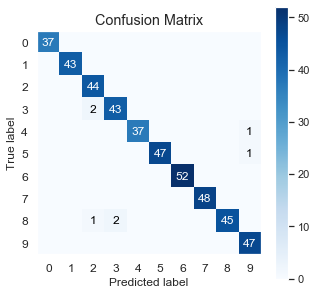

In [91]:
import scikitplot as skplot

y_pred = pipe_20.predict(X_test)
skplot.metrics.plot_confusion_matrix(y_test, y_pred, hide_zeros=True)
plt.show()

In [92]:
# Predict
pipe_20.fit(X,y)
pipe_20.predict([X[25]]) # ทดสอบนำข้อมูลแถวที่ 5 มาทำนาย

array([5])

In [93]:
# โปรแกรมทำนายตัวเลขที่่วาดไว้โดย ใช้ Pipe_25
import numpy as np
from PIL import Image, ImageOps

def predict_digit(imgfile):
    img = Image.open('DIGIT_image_folder/'+imgfile).convert('L')
    img = ImageOps.invert(img)
    img = img.resize((8, 8), Image.ANTIALIAS)
    pixel = np.array(img)
    pixel = pixel / 255.0 *16
    pixel = pixel.astype('int')
    
    my_digit = pixel.reshape(1, -1)
    predicted = pipe_25.predict(my_digit) # ใช้ pipe_25
    plt.figure(figsize=(1, 1))
    plt.imshow(pixel, cmap=plt.cm.gray_r)
    plt.title('Predicted: {}'.format(predicted[0]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

imgfiles = ['digit0-004.png','digit1-005.png','digit3-001.png','digit4-001.png','digit5-001.png','digit6-001.png']

for i in imgfiles:
    predict_digit(i)

FileNotFoundError: [Errno 2] No such file or directory: 'DIGIT_image_folder/digit0-004.png'

# Workshop 9 : ทดลองกับ Face Recognition

In [ ]:
import numpy as np
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()

n_samples = len(faces.images)
X = faces.images
X = X.reshape(n_samples, -1)
# X = faces.data
y = faces.target
X.shape, y.shape

#ไม่ใช้ PCA

In [ ]:
from sklearn.model_selection import cross_val_score
from time import time
from sklearn.svm import SVC

model = SVC(kernel= 'linear')

start = time() # เวลาเริ่มต้น train
model.fit(X, y) 
print('{:.5f} sec'.format(time() -start)) # เวลาเสร็จสิ้นการทำงาน
      
cvs = cross_val_score(model, X, y, cv=10)
print('cross val scores {}'.format(cvs.round(2)))
print('Avarage (%) = {:.2f}'.format(cvs.mean()*100))

#ใช้ PCA

In [ ]:
# คำนวณ PCA เพื่อเป็นตัวแทนข้อมูล 90%
from sklearn.decomposition import PCA
pca = PCA()
pca_num = PCA(.90) # กำหนด component
pca_num.fit(X)
n_comp = pca_num.n_components_

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import StandardScaler # กรณีทำ Standard Scale ด้วย
# sc = StandardScaler()
# X_sc = sc.fit_transform(X)

# n_comp กำหนดเอง
pipe_faces_66_comp = Pipeline([
                                ('pca', PCA(n_components=n_comp, whiten= True)),
                                ('linsvc', SVC(kernel='linear'))
                              ])
start = time() # เวลาเริ่มต้น train
pipe_faces_66_comp.fit(X, y) 
print('{:.5f} sec'.format(time() -start)) # เวลาเสร็จสิ้นการทำงาน จะเห็นว่าเวลาเร็วกว่า 10 เท่า
      
cvs = cross_val_score(model, X, y, cv=10)
print('cross val scores {}'.format(cvs.round(2)))
print('Avarage (%) = {:.2f}'.format(cvs.mean()*100)) 


# Workshop 10 : การย้อนกลับ PCA

In [ ]:
n_component = n_comp
pca = PCA(n_components=n_component)
PCAs = pca.fit_transform(faces.data)
reverse = pca.inverse_transform(PCAs) # คำนวณย้อนกลับให้เป็นตัว components เดิม

import matplotlib.pyplot as plt
fig, ax =plt.subplots(2, 5, figsize=(12, 5),
                    subplot_kw={'xticks':[], 'yticks':[]},
                    gridspec_kw = dict(hspace = 0.1, wspace =0.1))

for i in range(5):
    ax[0, i].imshow(faces.data[i].reshape(64, 64), cmap='binary_r')
    ax[1, i].imshow(reverse[i].reshape(64, 64), cmap='binary_r')
ax[0, 0].set_ylabel('Full features')
ax[1, 0].set_ylabel('PCA\nReconstruction');
plt.show()
#จะเห็นว่ารูปไม่แตกต่างจากเดิมไปมาก


In [ ]:
n_comp = 60
pca = PCA(n_components = n_comp)
pca.fit_transform(faces.data)

fig, axes =  plt.subplots(2, 6, figsize=(10, 3.4),
                    subplot_kw={'xticks':[], 'yticks':[]},
                    gridspec_kw = dict(hspace = 0.1, wspace =0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(64, 64), cmap='binary')
    
plt.show()
